# Exploration of Tidyverts: Tidy Tools for Time Series

By Satyen Sabnis

# Introduction

Tidyverts is a collection of Tidy tools for time series analysis. It contains packages: **tsibble, fable, feasts, tsibbledata**, etc.

The **tsibble** package provides the data structure that is used in fable forecasting, it works similar to a dataframe but for time series data

**Fable** created by Mitchell O'Hara-Wild is a time series forecasting package that has various **forecasting models** that can be used to forecast data. It is an improvement on Mitchell O'Hara-Wild's older package, forecast, by being more user-friendly and easier to work with, with the tsibble data structure. As more time series data is being collected and how it is collected is changing, their needs to be a way of not only forecast monthy, yearly, and quarterly data but also daily and hourly. The forecast package struggled and downright didnt have the tools to do this. The fable package provides tools to deal with more precise data.

The **tsibbledata** package provides users access to example tsibble datasets that can be used in the fable forecasting. The feast package provides tools for analyzing time series data and works closely with the fable package.

For this exploration I want to mainly focus on the tsibble, fable, and tsibbledata packages in the tidyverts collection but just know there are more packages that the tidyverts collection provides. I will go through each of these packages seperately and explain how to use them with examples and background information and then at the end I will combine all we have learned into an example forecasting a time series dataset.



















To work with these packages you first have to install them

In [1]:
install.packages("tsibble");

install.packages("fable")

install.packages("tsibbledata")

install.packages("feasts");

install.packages("tidyverse") #package that works well with tidyverts, has pipeline functions which helps create data manipulation flow from on to another (this package wont be explained as it is not what is being explored in this project)
install.packages("ggplot2") #used for visualizing time series again, not part of the tidyverts collection exclusively

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’, ‘anytime’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘progressr’, ‘numDeriv’, ‘fabletools’, ‘distributional’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘warp’, ‘slider’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Tsibble

Tsibble is very similiar to the tibble package in the tidyverse package (if you have worked with tidyverse) but works on the basis of organization of time. A tsibble has three main components: the **key** , the **index**, and the **measured variables**. The index is a variable of some sort of time; dates, seconds, years, etc. The key is a set of variables that define observational units over time; country, region, state, etc. The measured variables are what is measured in the time series data; electricity consumption, stock price, etc. and what we are trying to forecast. Tsibble uses these keys to handle multiple time series in one tsibble object. Those three in combination form the rows/observation in a tsibble dataframe.

In tsibble, these observations are measured on a common **interval** (if you are working with regular spaced data)

Tsibble handles different time intervals as seperate classes. If you are not using the the example tsibble datasets and instead you are reading data from a csv/or manually inputting data you use the corresponding functions to convert the time index to whatever interval the time series corresponds to

$ $


| Interval  | Class | Function          |
|-------|-----|----------------|
| Annual  | integer/double  | start:end       |
| Quarterly | yearquarter  | yearquarter ( )  |
| Monthly   | yearmonth  | yearmonth ( )        |
| Weekly  | yearweek  | yearweek ( )       |
| Daily | Date/difftime  | as_date ( ), ymd ( )  |
| Subdaily   | POSIXt/difftime/hms  | as_datetime ( ), ymd_hms ( )       |


We can take a look at an example.

Say we are looking at the average utility bill for each state. What would be the index, key, and measured variable if this data were to put into a tsibble data frame?

The index would be the **month**, the key would be the **state**, and the measured variable would be the **average utility bill**. In this case each state and its average utility bill would represent a seperate time series.


We can do this in R using the **tsibble ( )** object specifiying both the key and index parameter. If you have an existing dataframe you can convert it into a tibble using **as_tibble()** on the index and key variable

Below, I load the package tsibble and define the tsibble object, I then define the Month, State, and Average Utility Bill variables. I set Month as the index which represents the time component, I set the key as the state which represents the different states we are looking at, and finally the measured variable we are looking at is the Average Utility Bill. Also I use the
yearmonth() function on the month variable to define the data has monthy time series data

In [2]:
library(tsibble)

ulitity_per_month = tsibble(Month = yearmonth(c("2023 Jan", "2023 Feb", "2023 Mar", "2023 Apr", "2023 May")), State = c("GA","GA","GA","GA","GA"),  Average_Utility_Bill = c(70, 65, 62, 60, 58), index = Month, key = State)

print(ulitity_per_month)



Attaching package: ‘tsibble’


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




# A tsibble: 5 x 3 [1M]
# Key:       State [1]
     Month State Average_Utility_Bill
     <mth> <chr>                <dbl>
1 2023 Jan GA                      70
2 2023 Feb GA                      65
3 2023 Mar GA                      62
4 2023 Apr GA                      60
5 2023 May GA                      58


From the output you can see some of the information besides the dataframe that tsibble returns. First it tells you how many rows and columns are in the dataset, in this case their is 5 rows and 3 columns. The "[1M]" tells you that this is **monthly data**. Then it gives you the key which in this case is State. The "[1]" after the state tells you that their is only one time series in this data set. Tsibble can also work with multiple time series and that would be reflected by a number greater than one in that box. In our case I only displayed data from Georgia, but if I were to include data for all states (looking at multiple time series), that would something look like this which would represent 52 different time series in the tsibble object

 Key:       State [52]

Lets now read data from a csv and convert the data to a tsibble object using **as_tsibble()** to use for time series forecasting

In [3]:
library(tidyverse)

system("gdown --id 11SpOgWitIiEo5_k41nNJ8R5E8MuzTzRM -O /content/sample_data/Electric_Data.csv")

electric = read.csv("/content/sample_data/Electric_Data.csv")

electric_tb = electric %>% mutate(Month = yearmonth(DATE), Electricity_Consumption = IPG2211A2N) %>% as_tsibble(index = Month) %>% select(Month, Electricity_Consumption)

print(electric_tb)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()       masks stats::filter()
✖ lubridate::interval() masks tsibble::interval()
✖ dplyr::lag()          masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# A tsibble: 397 x 2 [1M]
      Month Electricity_Consumption
      <mth>                   <dbl>
 1 1985 Jan                    72.5
 2 1985 Feb                    70.7
 3 1985 Mar                    62.5
 4 1985 Apr                    57.5
 5 1985 May                    55.3
 6 1985 Jun                    58.1
 7 1985 Jul                    62.6
 8 1985 Aug                    63.2
 9 1985 Sep                    60.6
10 1985 Oct                    56.3
# ℹ 387 more rows


Here I used the **as_tsibble()** function on the index variable, Month, to convert the dataframe into a tsibble object. I also used the yearmonth() because I could see the data was measured every month. In this dataset their is no key as we are only looking at a single time series

# TsibbleData

This is a very simple package in the Tidyverts package that provides adequate time series datasets that users can use. In our example later I will use one of these datasets. So, lets show how to load and plot  these datasets.

# A tsibble: 29,364 x 4 [1M]
# Key:       Animal, State [54]
      Month Animal                     State                        Count
      <mth> <fct>                      <fct>                        <dbl>
 1 1976 Jul Bulls, bullocks and steers Australian Capital Territory  2300
 2 1976 Aug Bulls, bullocks and steers Australian Capital Territory  2100
 3 1976 Sep Bulls, bullocks and steers Australian Capital Territory  2100
 4 1976 Oct Bulls, bullocks and steers Australian Capital Territory  1900
 5 1976 Nov Bulls, bullocks and steers Australian Capital Territory  2100
 6 1976 Dec Bulls, bullocks and steers Australian Capital Territory  1800
 7 1977 Jan Bulls, bullocks and steers Australian Capital Territory  1800
 8 1977 Feb Bulls, bullocks and steers Australian Capital Territory  1900
 9 1977 Mar Bulls, bullocks and steers Australian Capital Territory  2700
10 1977 Apr Bulls, bullocks and steers Australian Capital Territory  2300
# ℹ 29,354 more rows


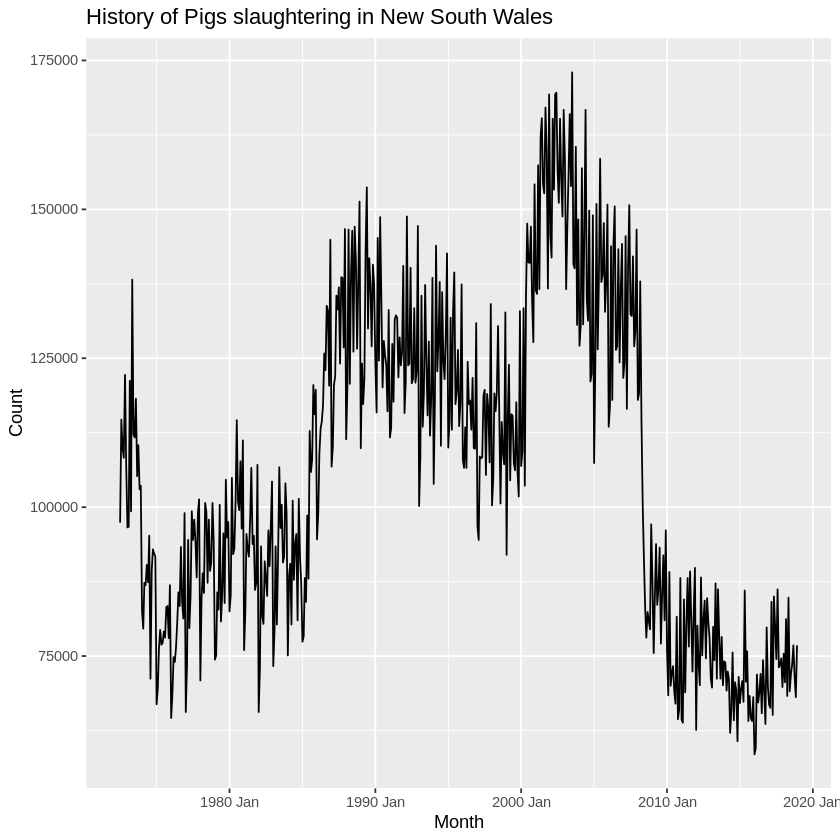

In [4]:
library(tsibbledata)

print(aus_livestock) #Load in australian livestock slaughtering time series data


aus_livestock %>% filter(Animal == "Pigs", State == "New South Wales") %>% ggplot(aes(x = Month, y = Count)) + geom_line() +
   labs(title = "History of Pigs slaughtering in New South Wales")


I loaded in australian livestock slaughtering time series data. By using what we learned in the previous section I can see that this data represents monthy data and has keys Animal and State. These two combination of keys make up 54 seperate time series in this tsibble object. The measured variable in this case is the count, the number of animal slaughtering.

Often when dealing with multiple time series in one object, if you want to extract and look at a single time series you can filter out the single time series you are looking for. In this case I wanted to look at the pigs slaughtering in New South Wales, so I plotted this data using ggplot() function

Their are multiple example data sets you can use to learn and practice your time series analysis. Some of them are listed below:

- ansett: Passenger numbers on Ansett airline flights
- aus_livestock: Australian livestock slaughter
- aus_production: Quarterly production of selected commodities in Australia.
- aus_retail: Australian retail trade turnover
- gafa_stock: GAFA stock prices
- global_economy: Global economic indicators
- hh_budget: 	Household budget characteristics
- monash_forecasting_repository: Get data from the Monash Forecasting Repository
- nyc_bikes: NYC Citi Bike trips
- olympic_running: Fastest running times for Olympic races
- PBS: Monthly Medicare Australia prescription data
- pelt: Pelt trading records



# Fable



As mentioned before, the fable package is where we do the actual forecasting of our data using various models. Now that we have learned the **data structure** used in fable and how to load some **example datasets**, we have to learn out to use some main functions in fable to be able to **forecast** data

The first main function that is important is the **model()** function, which is used to estimate model specifications of your data. It follows a similar structure to the lm() function in R where you define your response variable and your predictors. It then returns what is known as a mable, which is a model table, which contains a row for each time series (if you are working with multiple time series) and the columns represents the model specifications that are applied or that you applied.

Though fable has many models we can use, I want to focus on three popular models that are used for time series data; **ETS** (Exponential Smoothing), **ARIMA** (AutoRegressive Integrated Moving Average), and **TSLM** (Time Series Regression Models) . There are many more complex models that can be used in fable but these three are good starters. Lets explain the basics of these models and how they work. Then I will show you out to use these models in the model() function using the fable package in R

**ARIMA (AutoRegressive Integrated Moving Average)**

The ARIMA model is the combination of the autoregressive model AR(p), which is a linear combination of past values,

$y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2} + ... + \phi_p y_{t-p} + ϵ_t $

the moving average model MA(q) which is the weighted moving average of the order q past residuals

$y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta \epsilon_{t-q} $

and the differencing componenent $y_t^{'}$ which differences the time series and helps make it more stationary

These components combined results in this model equation:

$y_t^{'} = c + \phi_1 y_{t-1}^{'} + ... + \phi_p y_{t-p}^{'} + \theta_1\epsilon_{t-1} + ... + \theta_q e_{t-q} + \epsilon_t$

This is the **ARIMA(p, d, q)** model.

p: represents how many values to look back on (AR component)

d: represents the order differencing you want to apply (ex: if d = 1, that would be differencing the time series once, if d = 2 that would be differencing the differenced time series, also called second order differencing)

q: represents the number of past residuals to look back on (MA component)




Though fable will **automatically** choose an ARIMA model if you dont provide any parameters, if you want to instantiate it manually by analyzing the PACF and ACF plots you can do this by using the **ACF()** and **PACF()** functions. This is from the **feasts** package in tidyverts which is a package that does feature extraction and statistics for time series data. For the sake of adding to much complexity to this notebook, as that package as many functions to cover, I left it out in this exploration. But I will be using the ACF() and PACF() function from that package

Loading required package: fabletools



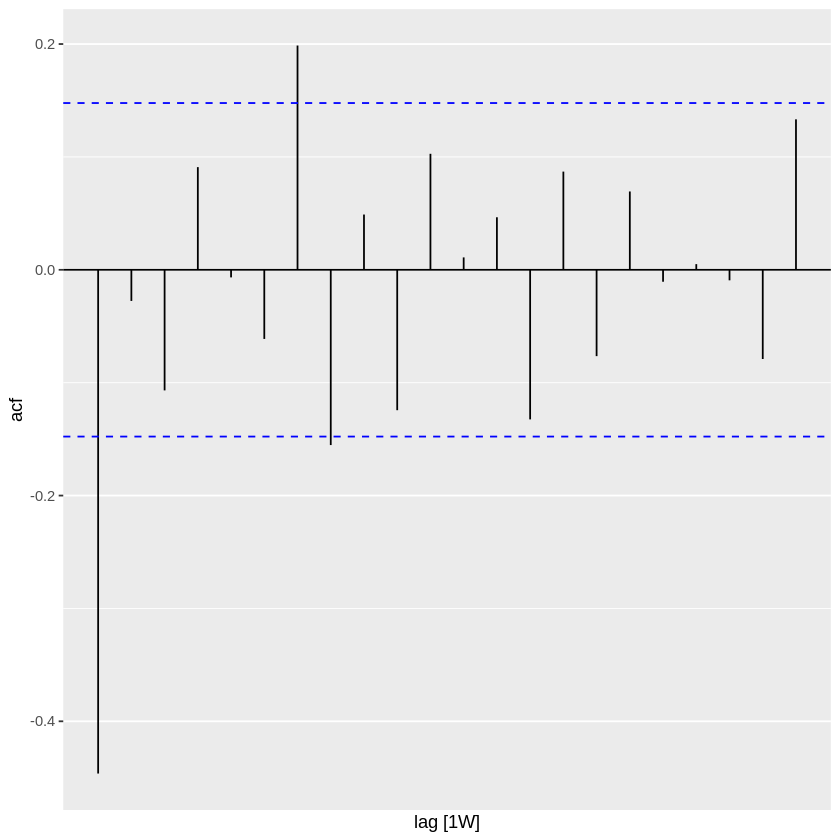

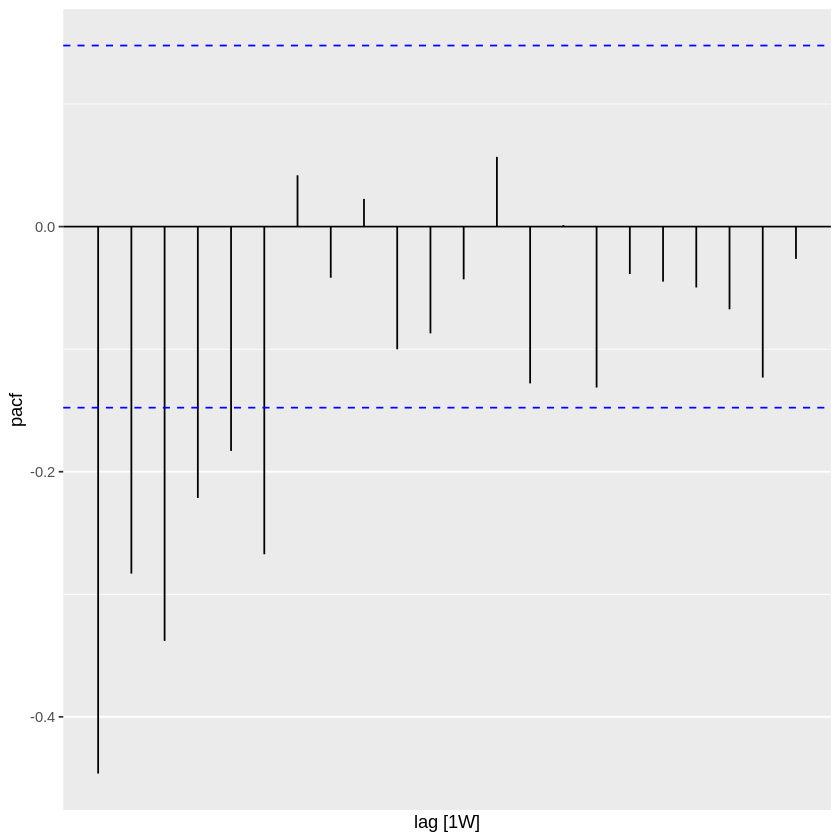

In [5]:
library(feasts)

bussiness_adl = ansett %>% filter(Airports == "ADL-PER" & Class == "Business")

bussiness_adl %>% ACF(difference(Passengers, differences = 2)) %>% autoplot()
bussiness_adl %>% PACF(difference(Passengers, differences = 2)) %>% autoplot()


I used the **ACF()** and **PACF()** functions to calculate both the ACF and PACF and then used **autoplot( )** which is a function in ggplot2() that automatically generates different types of plots based on the data it is given. In this case since the data that was passed was the acf and pacf it plotted the following plots accordingly. I also used the difference() from the tsibble package to difference the time series to make it more stationary. If I wanted to determine a ARIMA model based on these two plots I would propose a ARIMA(0,2,1) model. Since the ACF cuts off after lag 1 and pacf is tails off.

When using the ARIMA model, fable uses **Maximum Likelihood estimation** (MLE) to estimate coefficients given the data. MLE tries to find parameter values that maximizes the likelihood of getting the given data, which is essentially your training data.

**Maximum Liklihood function (MLE)** in general...

$W = {arg max}_W \Pi_l P(Y^l|X^L,W)$

$Y^L$ : represents the ground-truth data or your given time series data

$X^L$ : represents your training data

$W$ : represents the combination weights, in a time series case this would be coefficients/parameters of the ARIMA model

To determine how well your ARIMA model performs and to compare it with other models, their are various methods mathematical criterias that fable outputs. Some are the **AIC**(Akaike information critera), **AICc**, and **BIC**(Bayesion Information Criterion). The BIC criteria will penalize more complex models to avoid overfitting, while the AIC will not. For selecting the best models you look at a low BIC, AIC, and AICc.

$AIC = -2log(L) + 2(p + q + k + 1)$

L: represents the likelihood of the data
k: represents a constant(if their is not constant k = 0, if their is k = 1)

$AICc = AIC + \frac {2(p + q + k + 1)(p + q + k + 2} {T - p - q - k - 2}$

$BIC = AIC + [log(T) - 2](p + q + k + 1)$

Now that the ARIMA model is explained and how it works in fable lets actually do this in **R**. To use the ARIMA model in fable inside the model() function,  you define the name of your model, then use the ARIMA() function to instantiate an ARIMA object and inside it you define your response. If you you want manually create the ARIMA model you then use the **pdq( )** function and then inside define your p, d, and q parameters. If you dont specifically define these parameters, fable will automatically choose the best ARIMA model using the Hyndman-Khandakar algorithm. I wont go into detail on what this algorithmn does but essentially it uses a stepwise approach fitting various ARIMA models and finds the model with the lowest AICc.

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


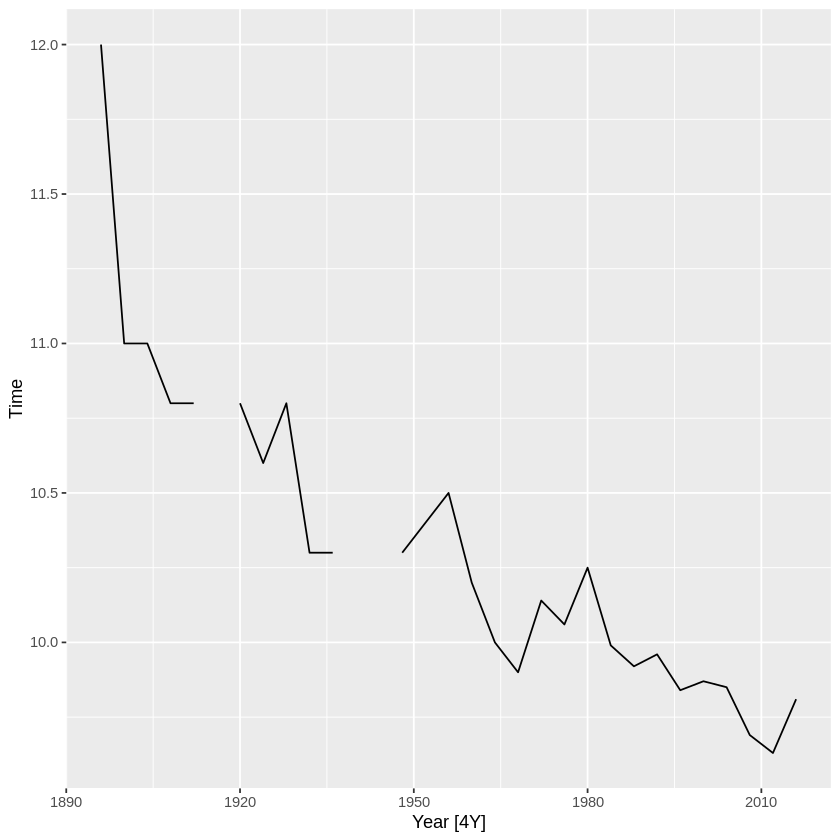

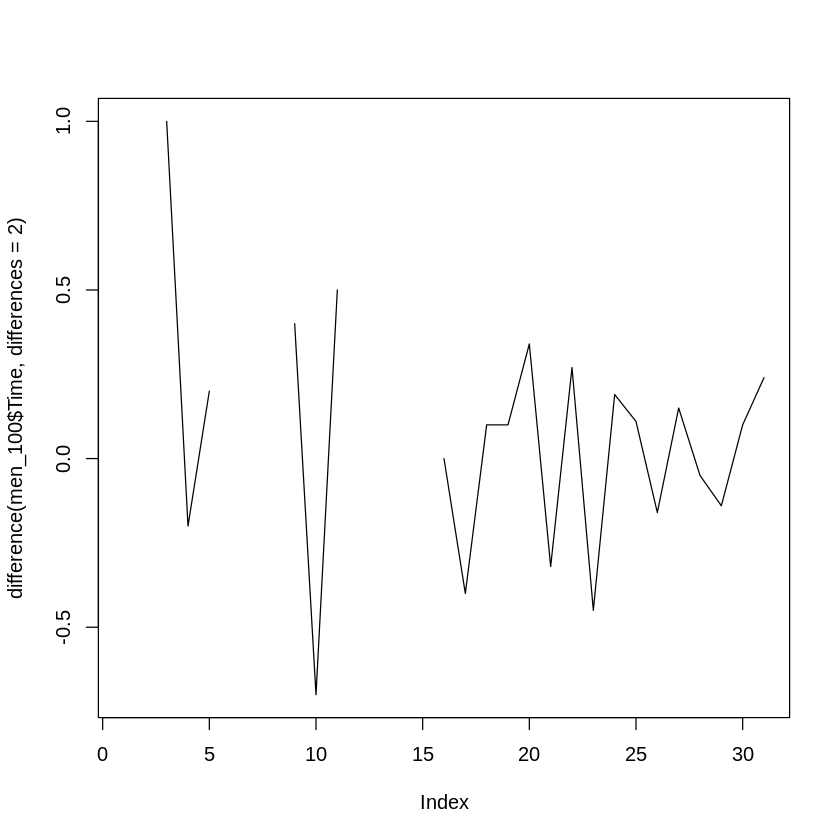

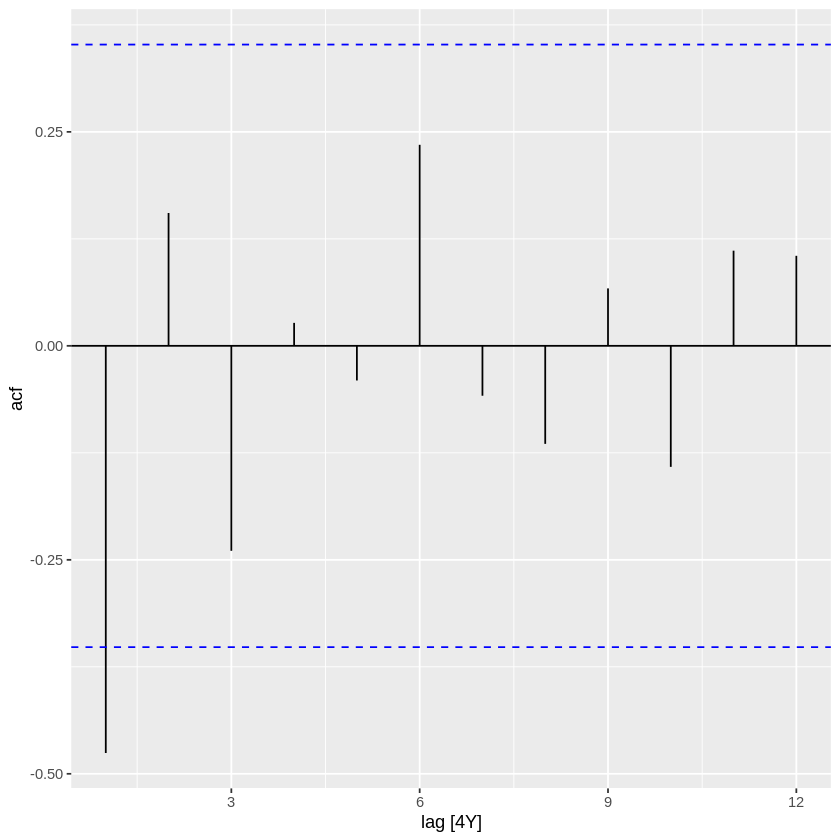

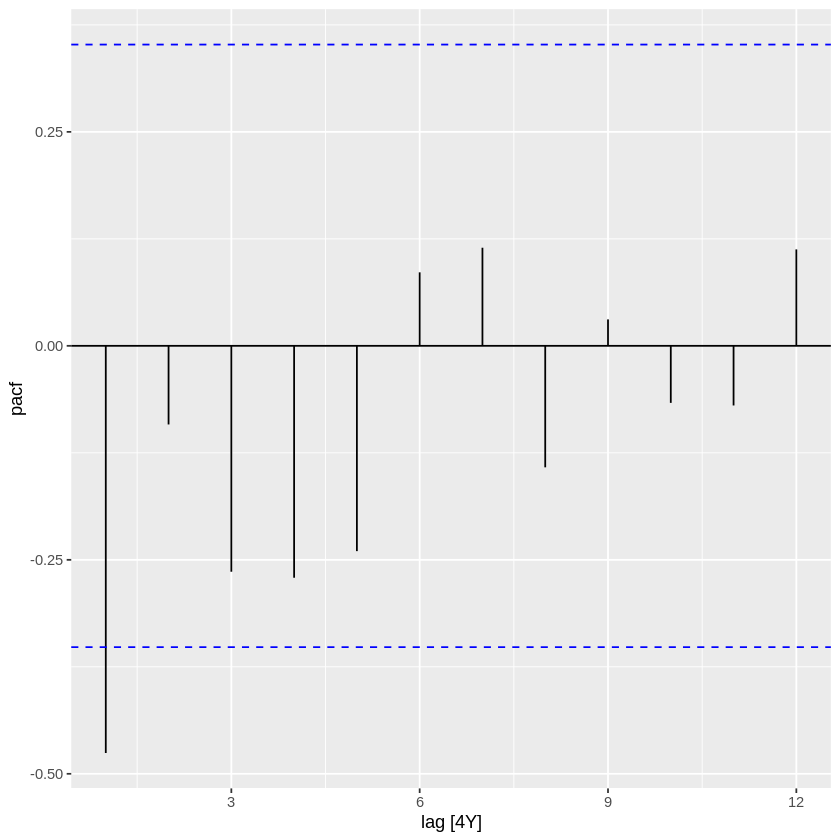

In [6]:
library(fable)

men_100 = olympic_running %>% filter(Length == 100, Sex == "men")

men_100 %>% autoplot(Time)

plot(difference(men_100$Time, differences = 2), type = 'line')
men_100 %>% ACF(difference(Time, differences = 2)) %>% autoplot()
men_100 %>% PACF(difference(Time, differences = 2)) %>% autoplot()


I am looking at men's olympic running time over the years. I first look at the differenced time series once , realize it doesnt look very stationary so I do it again. I then also look look at the ACF and PACF plots. Looking at the plots I propose either ARIMA(1,2,0), ARIMA(0,2,1), or ARIMA(1,2,1) model.

In [7]:
install.packages('urca'); library(urca) #needed for when fabble automatically proposes model

men_100_fit = men_100 %>% model(arima = ARIMA(Time), arima120 = ARIMA(Time ~ pdq(1,2,0)), arima121 = ARIMA(Time ~ pdq(1,2,1)), arima021 = ARIMA(Time ~ pdq(0,2,1)))

print(men_100_fit)
glance(men_100_fit)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A mable: 1 x 6
# Key:     Length, Sex [1]
  Length Sex                     arima       arima120       arima121
   <int> <chr>                 <model>        <model>        <model>
1    100 men   <ARIMA(0,1,1) w/ drift> <ARIMA(1,2,0)> <ARIMA(1,2,1)>
# ℹ 1 more variable: arima021 <model>


Length,Sex,.model,sigma2,log_lik,AIC,AICc,BIC,ar_roots,ma_roots
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>
100,men,arima,0.05271326,0.3788813,5.242237,6.165314,9.445829,,1.514773+0i
100,men,arima120,0.06285559,-4.0594987,12.118997,12.580536,14.853589,-1.345911+0i,
100,men,arima121,0.05807540,-2.2732332,10.546466,11.506466,14.648354,-2.577736+0i,1.13788+0i
100,men,arima021,0.06054720,-3.3312091,10.662418,11.123957,13.397010,,1.090815+0i


In the model parameter I wrote my three proposed models and also let ARIMA automatically choose as well. To compare the three models I used the **glance()** function to look at the different information criteria to select the best model. Looking at the output the best model with the lowest AICC, AIC, and BIC is the arima model that model automatically chose. With an AIC of 5.24, AICC of 6.16, and BIC of 9.44.

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_bin()`).”


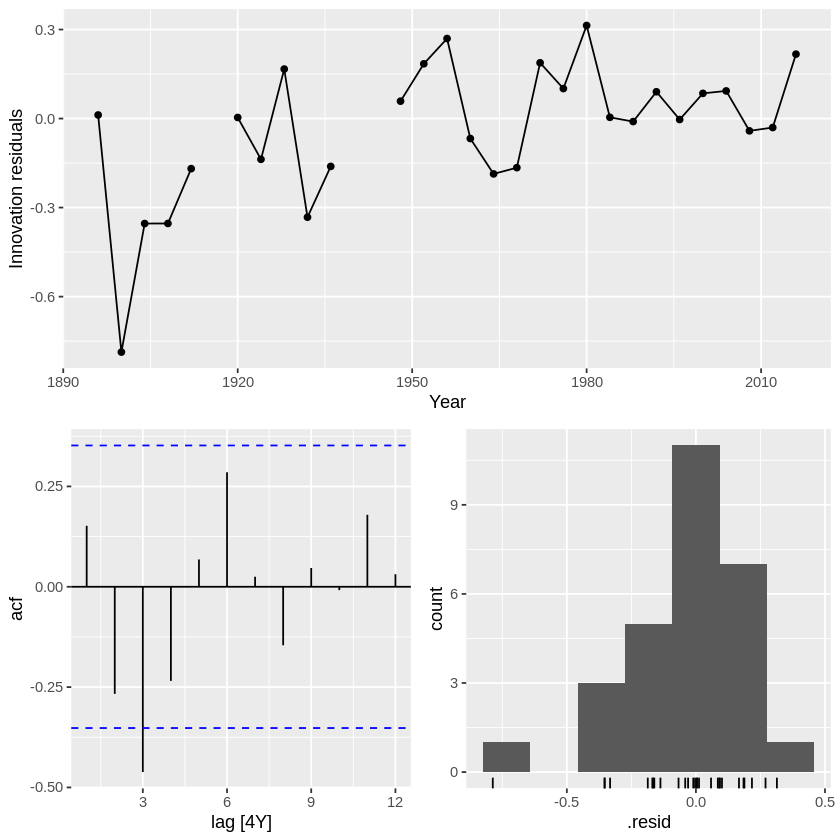

In [8]:
men_100 %>% model(arima = ARIMA(Time)) %>% gg_tsresiduals()

To look at the residuals of the fitted model to make sure they exhibit white noise and no information is left present in the residuals you can use the **gg_tsresiduals()** function in the feasts package. In this case I selected the best model which was the model fable automatically chose, and calculated the residuals using this function.

 Looking at the residuals you can see that the residuals arent completely random and dont exhibit completely white noise. The ACF plot looks mostly good as their is no significant correlation amongst most of the residuals. But for the most part the model does fairly well capturing the important information in predicting the men's 100m.

**ETS** (Exponential Smoothing)

Exponential smoothing is the weighted average of past values but their is a higher weight given to more recent values and lower weight given to older values.

$ \hat{y}_{T+1|T} = \alpha y_T + \alpha(1 - \alpha)y_{T-1} + \alpha(1-\alpha)^2y_{T-2}$

The T + 1 represents the weighted average of all the previous observations in the time series. The weights decrease using the parameter $\alpha$

In ETS you want to identify components that you see in the data. The two main components in time series data is the **trend component**; data that exhibits some sort of **trend** and a **seasonal component**; data that has a **seasonal pattern**. When there is no trend or smoothing the only component included is the **level**. Which is essentially just the equation stated above

Model Equation: $ \hat{y}_{T+1|T} = l_t $

Level equation: $ l_t = \alpha y_t = (1 - \alpha)l_{t-1} $

If the data has a trend to it you add an extra **trend** component

$b_t = \beta^*(l_t - L_{t-1}) + (1 - \beta^*)b_{t-1}$

The current trend equation is based on the average of previous trend estimates

If their is seasonality on top of the trend component you include a **seasonal** component. Their are two types of seasonal components; **additive** and **multiplicative** . When the data is constant you would choose additive. If the data changes every level (day, month, year) that would be multiplicative

These have two seperate equations

Additive Component

$ \hat{y}_{T+1|T} = l_t + hb_t + s_{t+h-m(k+1)}$

$l_t = \alpha(y_t - s_{t-m}) + (1 - \alpha)(l_{t-1} + b_{t-1}) $

$s_t = \gamma(y_t - l_{t-1} - b_{t-1}) + (1 - \gamma)s_{t-m}$

The first equation is the combination of the level equation, trend equation(shown above), and the seasonal equation. The seasonal equation is the weighted average of previous equations.

Multiplicative Component

$\hat{y}_{T+1|T} = (l_t + hb_t)s_{t+h-m(k+1)}$

$l_t = \alpha \frac {y_t} {s_{t-m}} + (1 - \alpha) (l_{t-1} + b_{t-1})$

$s_t = \gamma \frac {y_t}{l_{t-1} + b_{t-1}} + (1 - \gamma)s_{t-m}$



I dont want to go into to much detail but just know that what data exhibits what patterns and structure. Lets see an example to better illustrate this. We will first identify what components we need to add, if we have seasonality in our data we need to decide if it is addditive or multiplicative. Then we will fit and compare our models using the same model() and glance() function we used on the ARIMA model

# A mable: 1 x 2
      mul_elec      default
       <model>      <model>
1 <ETS(M,A,M)> <ETS(M,A,M)>


.model,sigma2,log_lik,AIC,AICc,BIC,MSE,AMSE,MAE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mul_elec,0.00037648,-1911.294,3840.587,3841.453,3871.048,566705.3,720887.1,0.01483631
default,0.00037648,-1911.294,3840.587,3841.453,3871.048,566705.3,720887.1,0.01483631


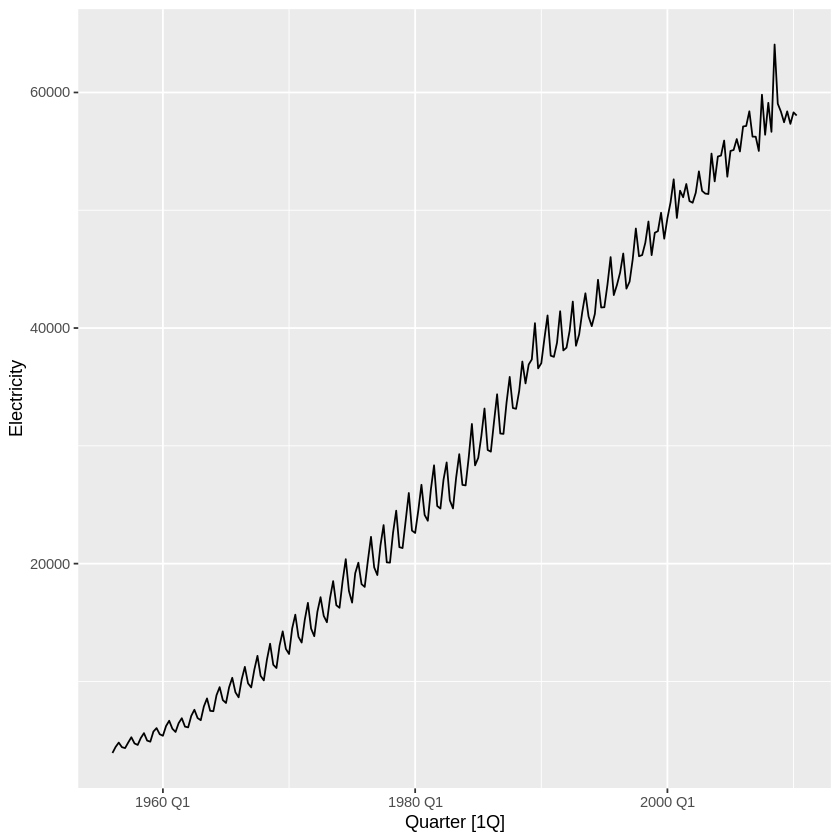

In [9]:
aus_production %>% autoplot(Electricity)

aus_electricity_fit = aus_production %>% model(mul_elec = ETS(Electricity ~ error("M") + trend("A") + season("M")), default = ETS(Electricity))

print(aus_electricity_fit)
glance(aus_electricity_fit)

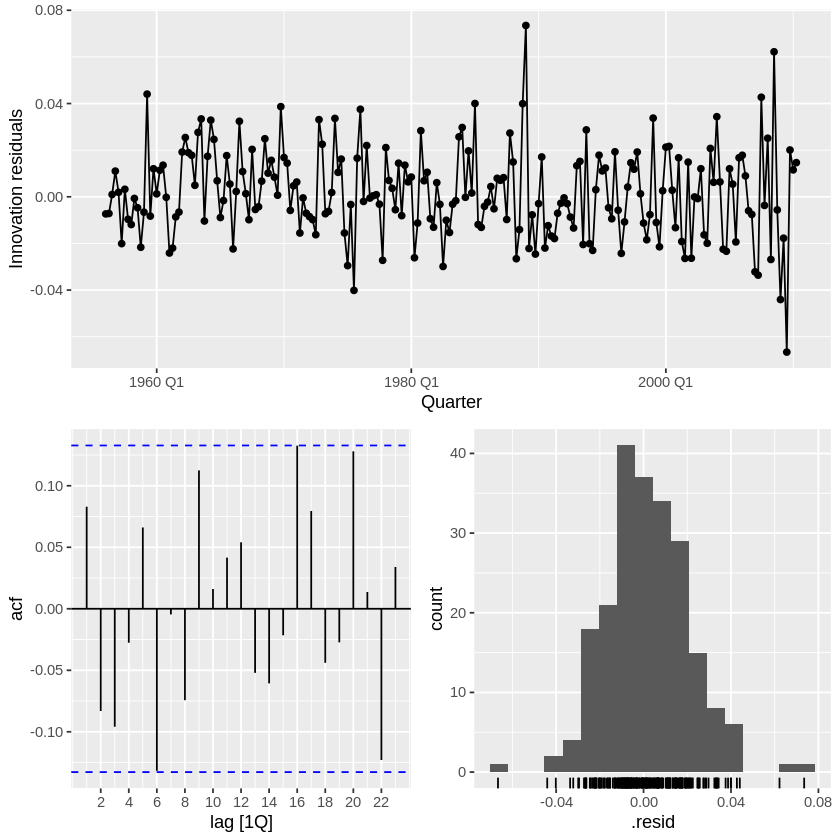

In [10]:
aus_electricity_fit %>% select(mul_elec) %>% gg_tsresiduals()

For this example I chose a australlian electricity production time series. Looking at the plot you can see a **clear trend** as it is constantly increasing as time increases. You can also that their is **seasonality** in the data has it constantly goes up and then down. Just using some basic background knowledge in the every winter and in the summer their will be an obvious increase in electricity production and in the other seasons the electricity use is less. So that is where the seasonality comes from. Also you can see that as the time intervals change that seasonalty curve variation is getting bigger and bigger as the years go on. This is a sign to use a **mutliplicative** component.

This is what I did prior to creating any models. In R I first initialized the ets model using the **ETS()** function, inside it I provided by response variable, Electricity,  and added the trend and seasonlity components using these functions; **trend()** and **error()** functions. How these functions work is if their is none of that component present in the model you would put "N"( Ex: trend("N")) If there is a trend component present in the model for the trend component you would put "A" in the function like this, trend("A"). For the seasonality component if the data is additive you would put season("A"), if it is multipicative you would put season("M")

In this case as a saw a trend and seasonality that showed a multipicative nature I initalized the model with the error term as shown above. I also wanted R to choose a model as well so I provided no formula for the second model. Turns out the model I selected was the same model that fable automatically picked as well. I then also used the glance() function to see the information criteria

I also looked at the residuals and they looked normal. There was also no significant correlations amongst the residuals.

**TSLM** (Time Series Regression Models)

As the name suggests, these are essentially linear regression models which uses predictor variables x to predict the response/forecast variables y which have linear relationships

$y_t = \beta_0 + \beta_1 x_t + \epsilon_t$

You are probabliy familiar with this equation. $\beta_0$ is the intercept, while $\beta_1$ is the slope. It tries to find coefficients  that reduce the error between actual y and predicted y

The coefficients are estimated through least squares estimation. Which similar to MLE for ARIMA tries to minimize the sum of squared errors

$\Sigma_{t=1}^{T} = \Sigma_{t=1}^{T}(y_t - \beta_0 - \beta_1x_{1,t} - \beta_2x_{2,t} - ... - \beta_k x_{k,t})^2$

The time series regression mode used in fable is very similar to the the lm() function in base R but it adds some time series functionalities. You can add a trend predictor in the model using **trend()** function. If you see that their is seasonality in the data and you want to use it as a function you can use the **season()** function

To declare a Time series regression model you can use the the **TSLM()** function in the model function. Inside you can define the forecast/response variable and then add your predictors. Lets see how to do this in R

# A mable: 1 x 3
# Key:     Country [1]
  Country           tsr auto_tsr
  <fct>         <model>  <model>
1 United States  <TSLM>   <TSLM>


Country,.model,r_squared,adj_r_squared,sigma2,statistic,p_value,df,log_lik,AIC,AICc,BIC,CV,deviance,df.residual,rank
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
United States,tsr,0.9881069,0.9866506,4.271661e+23,678.5041,2.309577e-45,7,-1599.243,3055.564,3058.628,3071.767,4.926852e+23,2.093114e+25,49,7
United States,auto_tsr,0.0000000,0.0000000,3.431376e+25,NA,NA,1,-1786.924,3413.251,3413.470,3417.372,3.491575e+25,1.955884e+27,57,1


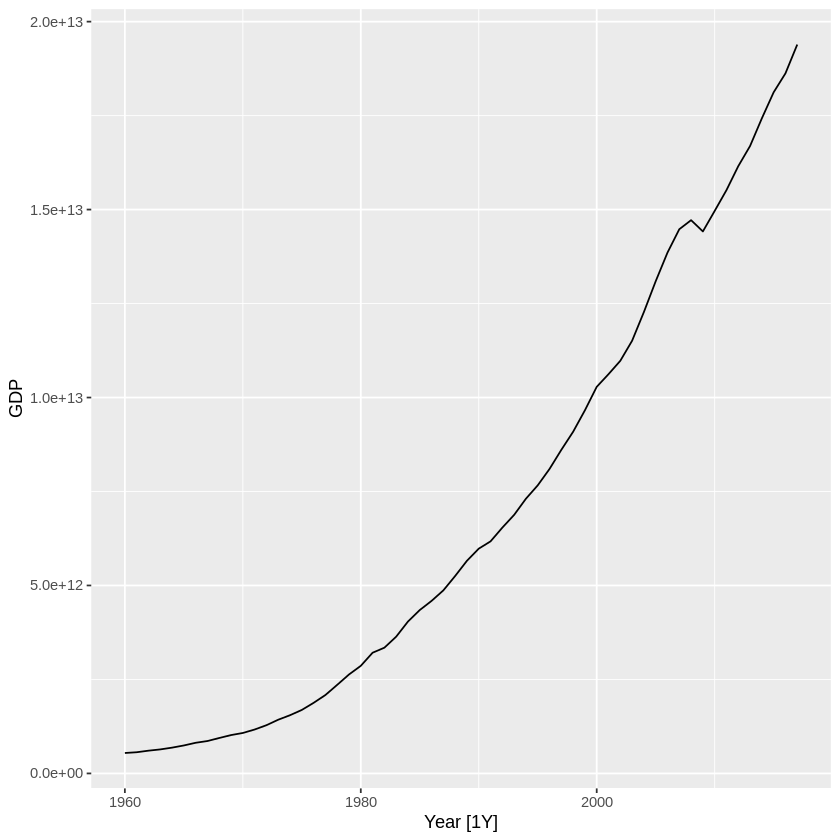

In [11]:

global_economy %>% filter(Country == "United States") %>% autoplot(GDP)

us_econ = global_economy %>% filter(Country == "United States")
global_econ_fit = us_econ %>% model(tsr = TSLM(GDP ~ Growth + CPI + Imports + Exports + Population + trend()), auto_tsr = TSLM(GDP))

print(global_econ_fit)
glance(global_econ_fit)

I first plotted the U.S GDP data that I was trying to forecast and I could see a pretty clear trend. When I created the TSLM model I included all predictors that I thought were relevant to GDP and also added a trend() predictor has their was a clear trend. The information criteria for TSLM is similiar to the ARIMA define above except it also includes R^2, which essentially tells you how well your data is fit.

Though TSLM is a very basic model by itself I wanted to include it because you can combine it with say the ARIMA model to have a model that accounts for past observations and other exogenous information. These models are called **Dynamic Regression models**. Though I wont be covering this model in this exploration do know you can combine these models to built better models.



The next function that is very important in the fable package is the **forecast ()** function. We have gone through how to fit various different models but have left out the most important part! Actually doing the forecasting based on the created models. I will explain a little background information on how the forecasting is calculated in the various models described above and then we can do it in R. I will also introduce another important function in fable which is the **accuracy ()** function. This function gives accuracy metrics on how well the model performed on the given data

**ARIMA Forecasting**

ARIMA forcasting works by expanding the ARIMA equation and putting all the terms to the right hand side of the equation and $y_t$ to the left. You then replace the time operator t, with t + h to forecast future values. For example if you are trying to forecast one value ahead (t+1), on the right side would be all past forecasts t, t-1,... with their coefficients plus the last observed error term. For larger h values, you iteravely do this process for future periods. Once you get $y_{t+1}$ , that now goes to the right side of the equation and now you are are forecast for $y_{t+2}$

This is how that looks like...

$ \hat{y}_{T+1|T} = (1 + \hat{\phi}_1)y_T - (\hat{\phi_1} - \hat{\phi_2}) y_{T-1} - (\hat{\phi_2} - \hat{\phi_3}) y_{T-2} - \hat{\phi_3}y_{T-3} + \hat{\theta}\epsilon_T$

For $\hat{y}_{T+2|T}$ the same process occurs, this happens iteratively for how many values you want to forecast. Keep in mind the farther values you forecast the lower the accuracy of the forecast will be. It is very hard to forecast very far out values as we dont know the different factors that can affect future events.

Now lets forecast some future Men's 100m using the model we fitted previously

# A fable: 3 x 6 [4Y]
# Key:     Length, Sex, .model [1]
  Length Sex   .model  Year          Time .mean
   <int> <chr> <chr>  <dbl>        <dist> <dbl>
1    100 men   arima   2020 N(9.6, 0.053)  9.61
2    100 men   arima   2024 N(9.6, 0.059)  9.55
3    100 men   arima   2028 N(9.5, 0.065)  9.50


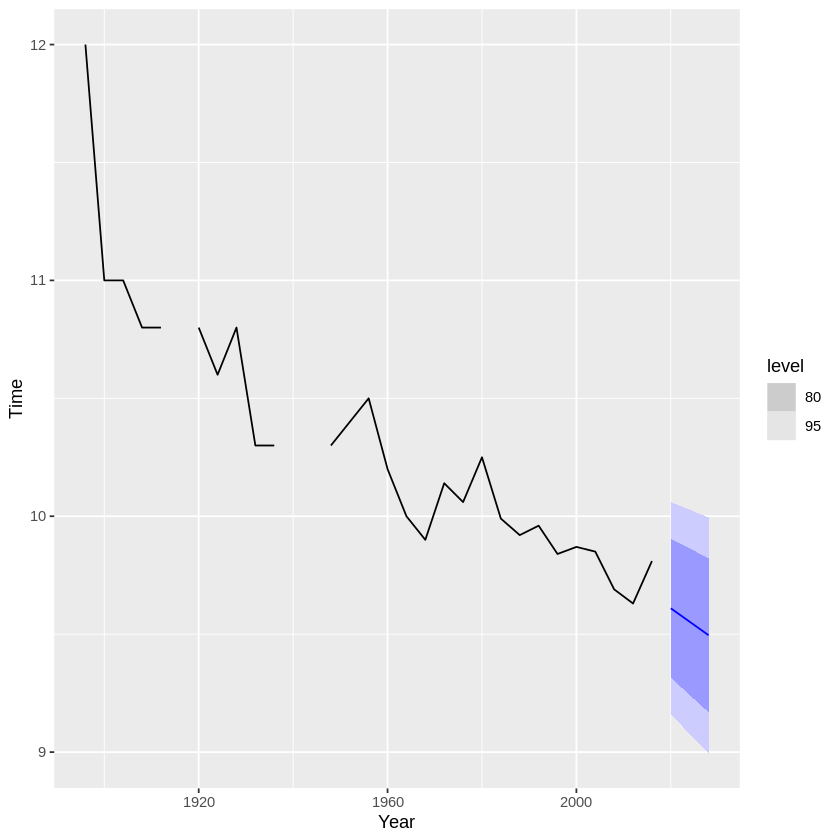

In [12]:
forecast_men_100 = men_100_fit %>% forecast(h = 3) %>% filter(.model == "arima")

print(forecast_men_100)

forecast_men_100 %>% autoplot(men_100)


I used the best fitted arima model and forecasted 3 time intervals or 12 years ahead. I did this using the **forecast()** function and specified how many intervals I wanted to forecast; h = 3. This depends on the data's structure, in this example the  men's 100m data is collected every 4 years. Then I used autoplot() function which will automatically plot both the time series and the forecast which is convenient. Looking at the time series the forecast makes sense since their is a downward trend. You would expect with new technology to aid better athletes, that the time for the 100m will decrease over time.

The line the forecast produces is the mean forecast, called the **point forecast**. Fable also gives the distributions of the confidence intervals. Though when you use autoplot() it will only plot the 80% and 95% confidence intervals which are common. Meaning based on the confidence interval(the broader one being 95%) we are either 80% or 95% confident that the true forecast will lie between these intervals.

We can see our well our model did using the **accuracy ()** function

In [13]:
men_100_fit %>% accuracy() %>% filter(.model == "arima")

Length,Sex,.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,men,arima,Training,-0.03610653,0.2295937,0.1637842,-0.3176549,1.565846,0.9412884,0.8600764,0.3690085


**ETS** Forecasting

Similar to the ARIMA forecasting you iterate values for T = 1, 2 ... T + h. An example of a forecast for a trend component would be, you would get T+1 by adding the level equation for the current time plus the trend equation at time t. That will give you the forecast at t+1. And this process interates for each T.

Example Forecast:
$\hat{y}_{T+1|T} = l_T + b_T$

In R, you do the same thing you did with the arima forecasting.

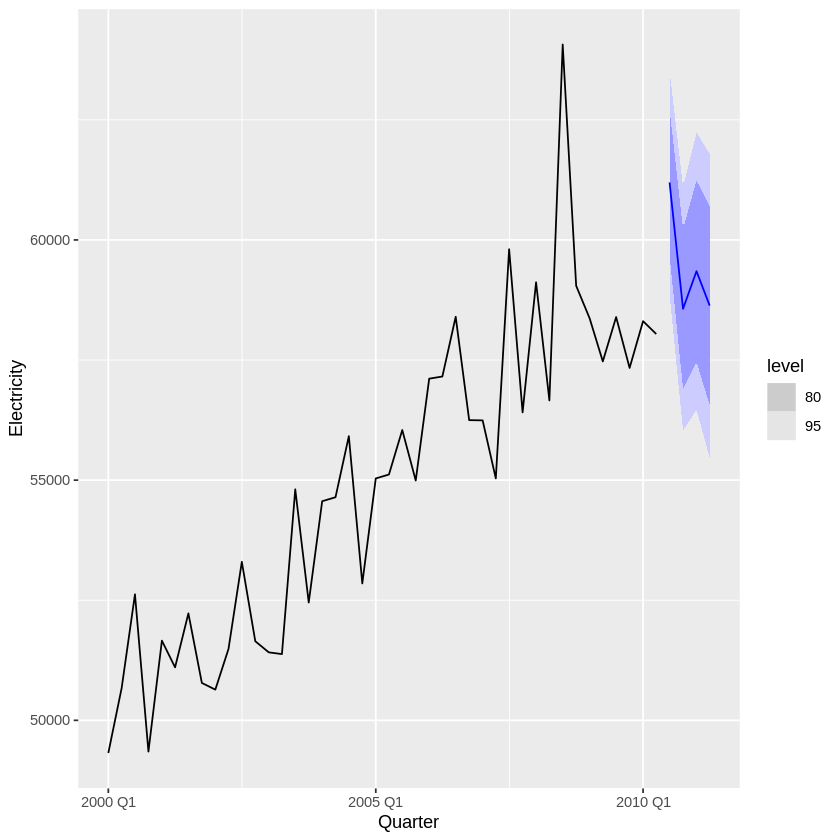

In [14]:

aus_electricity_fit %>% forecast(h = 4) %>% filter(.model == "mul_elec") %>% autoplot(filter(aus_production, year(Quarter) >= 2000))

Similarily to the ARIMA forecasting you use the forecast() function, define your h, and then plot. In this case I wanted to see the forecasts better so I looked at the data after 2000. The forecast seems to capture the patterns in the time series pretty well.

Lets also check the accuracy of the model

In [15]:

aus_electricity_fit %>% accuracy() %>% filter(.model == "mul_elec")

.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mul_elec,Training,3.442893,752.7983,474.3838,0.1389651,1.477257,0.4203353,0.5451098,-0.01447014


The model does relatively well and at least does better than the naive baselines, indicated by a MASE < 1, which measures the accuracy of a forecast relative to the mean absolute error of a naive baseline model. A naive approach/model is something like using the mean of all past values to forecast future values, very simple baseline results.

**TSLM Forecasting**

Time Series Regression forecasts based on the past values of x plus some random error term

$y_{t+h} =  \beta_0 + \beta_1x_1,t + ... + \beta_kx_{k,t} + \epsilon_{t+h}$

We do the same thing we did before

Country,.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
United States,tsr,Training,-2.107949e-05,1.440001e+12,1.271085e+12,35.23496,65.73863,3.725608,3.53262,0.9127179
United States,auto_tsr,Training,3.196782e-04,5.807077e+12,5.026264e+12,-207.53981,242.15131,14.732207,14.24596,0.9476482


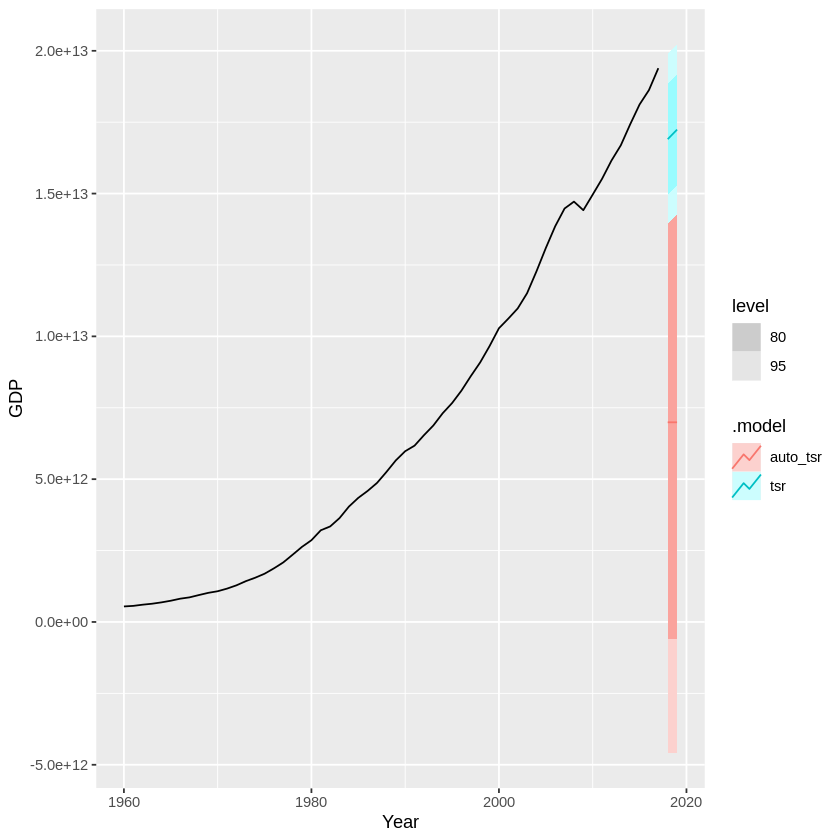

In [16]:
us_econ_fit = us_econ %>% model(tsr = TSLM(GDP ~ trend()), auto_tsr = TSLM(GDP))

us_econ_fit %>% forecast(h = 2)  %>% autoplot(us_econ)

us_econ_fit %>% accuracy()

Since I didnt know the future external predictors such as Population, Imports,
etc. I redid the model only providing trend as the predictor. As you would probably suspect since there are alot more predictors to the model than the  trend, it did pretty poorly and the automatic model that fable proposed did even worse.

# Putting It All Together: Example

Now that we have gone over everything about time series analysis and forecasting with the tidyverts collection, lets use everything we have learned to do a simple time series analysis and forecast on a time series data in the TsibbleData package

# A tsibble: 15,150 x 9 [1Y]
# Key:       Country [263]
   Country     Code   Year         GDP Growth   CPI Imports Exports Population
   <fct>       <fct> <dbl>       <dbl>  <dbl> <dbl>   <dbl>   <dbl>      <dbl>
 1 Afghanistan AFG    1960  537777811.     NA    NA    7.02    4.13    8996351
 2 Afghanistan AFG    1961  548888896.     NA    NA    8.10    4.45    9166764
 3 Afghanistan AFG    1962  546666678.     NA    NA    9.35    4.88    9345868
 4 Afghanistan AFG    1963  751111191.     NA    NA   16.9     9.17    9533954
 5 Afghanistan AFG    1964  800000044.     NA    NA   18.1     8.89    9731361
 6 Afghanistan AFG    1965 1006666638.     NA    NA   21.4    11.3     9938414
 7 Afghanistan AFG    1966 1399999967.     NA    NA   18.6     8.57   10152331
 8 Afghanistan AFG    1967 1673333418.     NA    NA   14.2     6.77   10372630
 9 Afghanistan AFG    1968 1373333367.     NA    NA   15.2     8.90   10604346
10 Afghanistan AFG    1969 1408888922.     NA    NA   15.0    10.1    10854

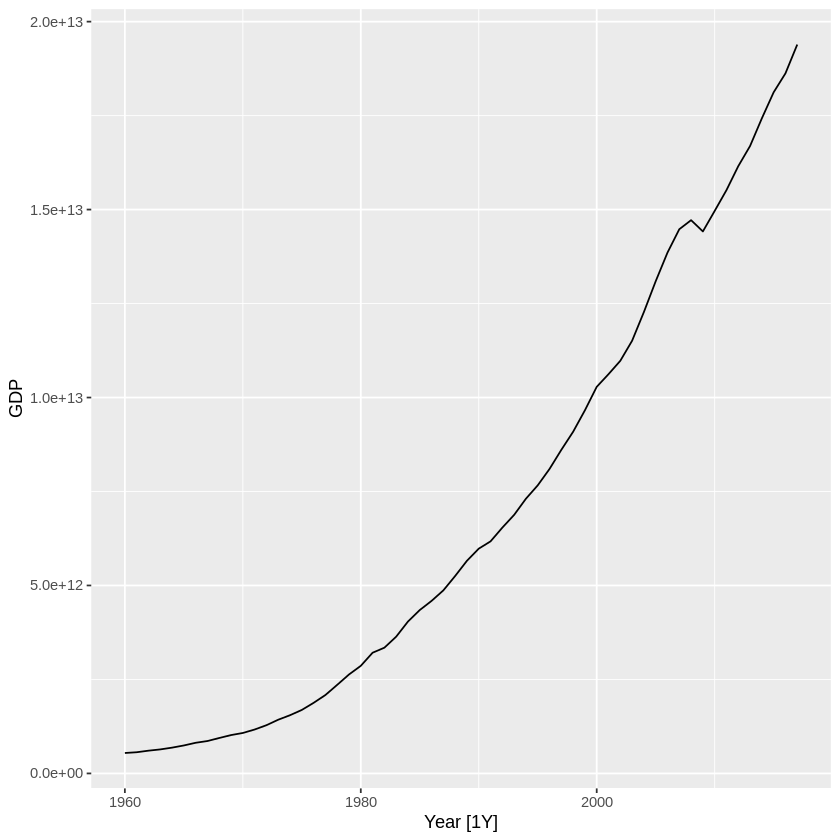

In [17]:
print(global_economy)

global_economy %>% filter(Country == "United States") %>% autoplot(GDP)

us_econ = global_economy %>% filter(Country == "United States")

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


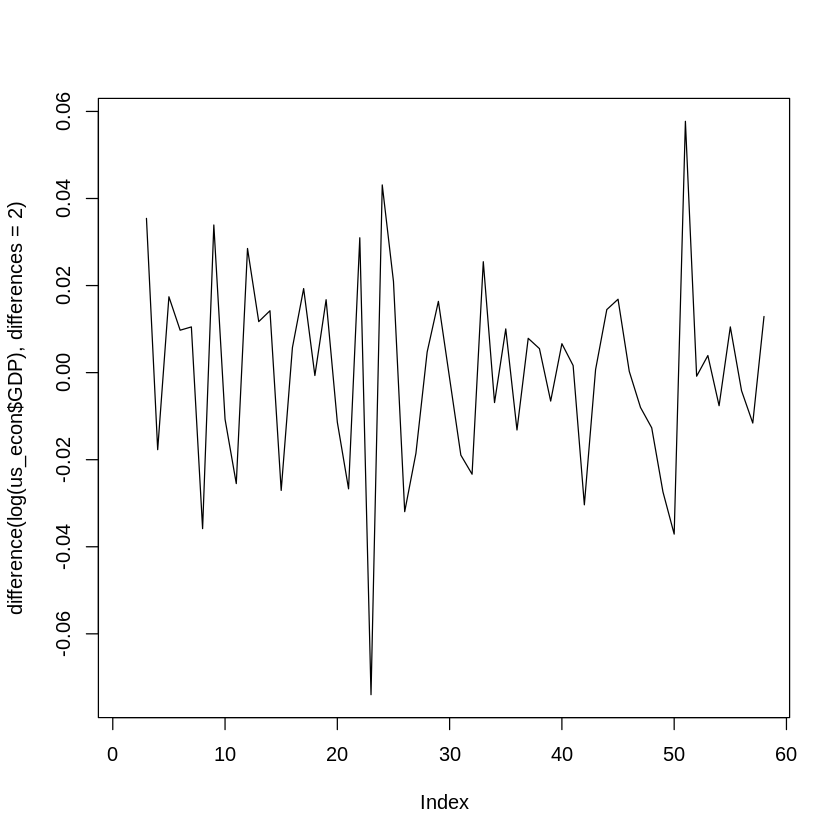

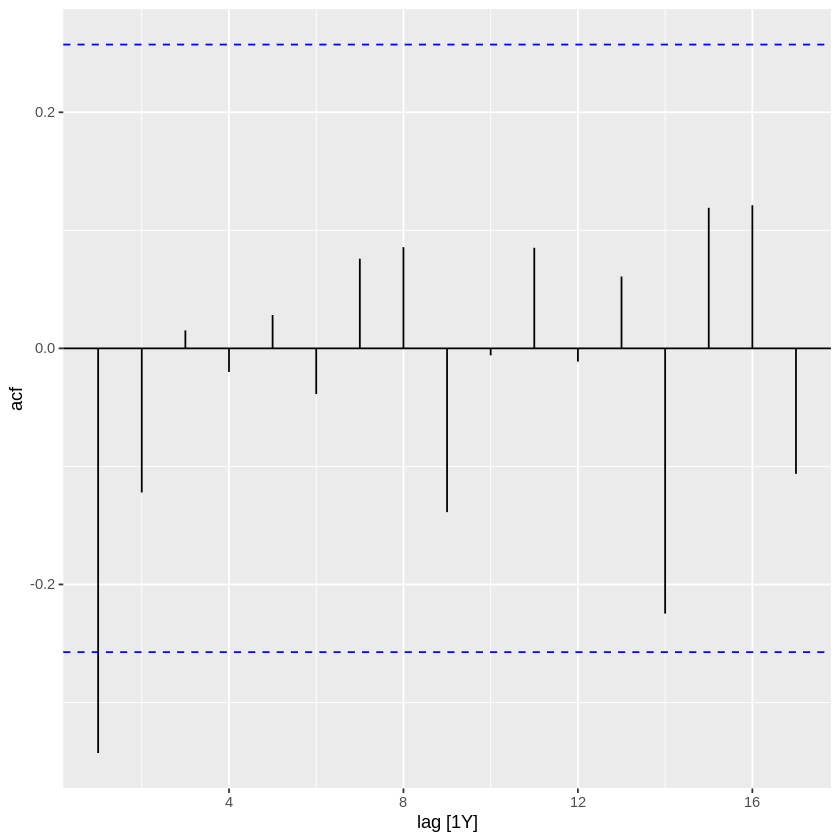

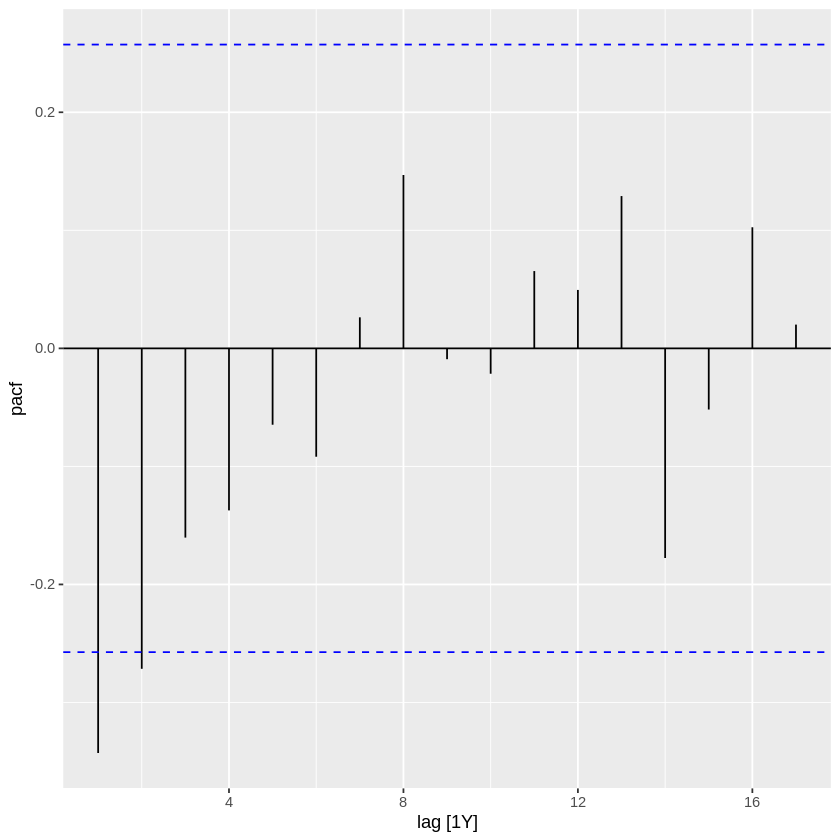

In [18]:

plot(difference(log(us_econ$GDP), differences = 2), type = 'line')
us_econ %>% ACF(difference(log(GDP), differences = 2)) %>% autoplot()
us_econ %>% PACF(difference(log(GDP), differences = 2)) %>% autoplot()

In [19]:
us_econ_fit = us_econ %>% model(arima021 = ARIMA(log(GDP) ~ pdq(0,2,1)), ETS(GDP ~ error("A") + trend("A") + season("N")), auto_arima = ARIMA(GDP), auto_ETS = ETS(GDP), tsr = TSLM(GDP ~ trend()))

print(us_econ_fit)
glance(us_econ_fit)

# A mable: 1 x 6
# Key:     Country [1]
  Country            arima021 ETS(GDP ~ error("A")…¹     auto_arima     auto_ETS
  <fct>               <model>                <model>        <model>      <model>
1 United Stat… <ARIMA(0,2,1)>           <ETS(A,A,N)> <ARIMA(0,2,2)> <ETS(M,A,N)>
# ℹ abbreviated name: ¹​`ETS(GDP ~ error("A") + trend("A") + season("N"))`
# ℹ 1 more variable: tsr <model>


Country,.model,sigma2,log_lik,AIC,AICc,BIC,ar_roots,ma_roots,MSE,⋯,MAE,r_squared,adj_r_squared,statistic,p_value,df,CV,deviance,df.residual,rank
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
United States,arima021,4.278055e-04,139.7637,-275.5273,-275.3009,-271.4766,,1.57409+0i,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
United States,"ETS(GDP ~ error(""A"") + trend(""A"") + season(""N""))",2.980412e+22,-1616.3996,3242.7992,3243.9531,3253.1014,NULL,NULL,2.774866e+22,⋯,1.060774e+11,NA,NA,NA,NA,NA,NA,NA,NA,NA
United States,auto_arima,2.614994e+22,-1524.0753,3054.1507,3054.6122,3060.2267,,"1.248341+0i, -2.628248+0i",NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
United States,auto_ETS,6.784848e-04,-1590.3934,3190.7868,3191.9406,3201.0890,NULL,NULL,2.785770e+22,⋯,1.914328e-02,NA,NA,NA,NA,NA,NA,NA,NA,NA
United States,tsr,2.147661e+24,-1706.0470,3253.4971,3253.9416,3259.6785,NULL,NULL,NA,⋯,NA,0.9385091,0.9374111,854.7045,1.33627e-35,2,2.267226e+24,1.20269e+26,56,2


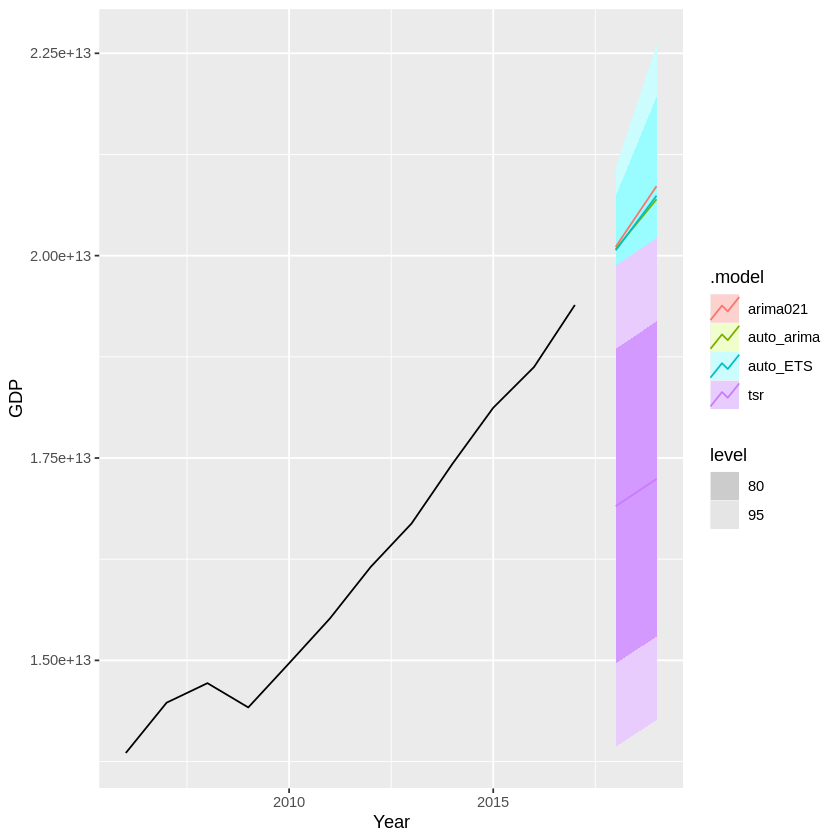

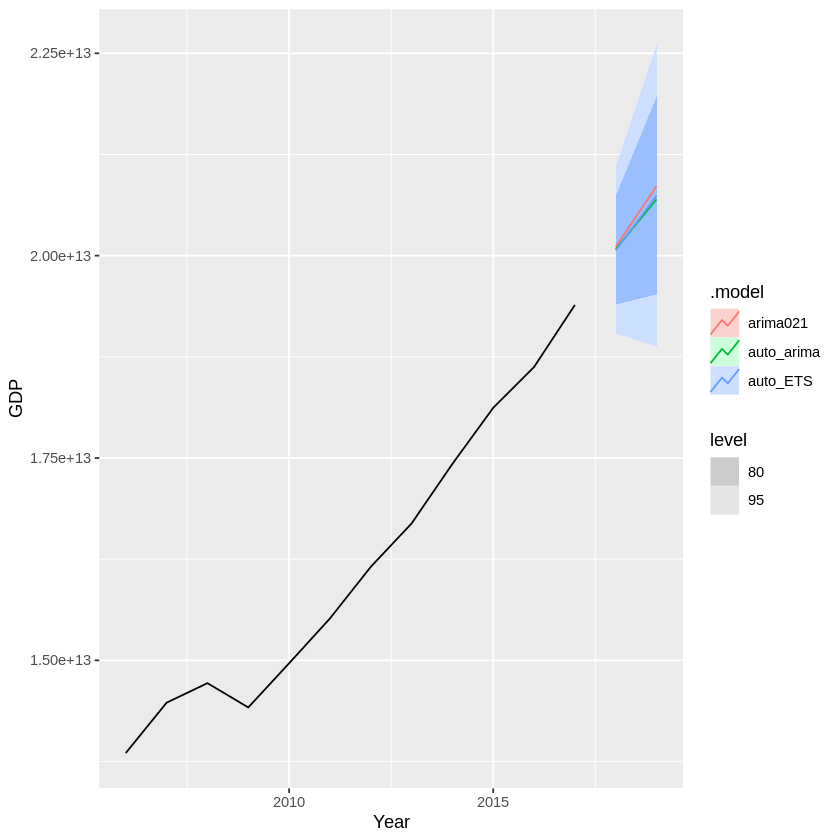

In [20]:
us_econ_fit %>% forecast(h = 2) %>% filter(.model == "auto_arima" | .model == "auto_ETS" | .model == "tsr"| .model == "arima021") %>% autoplot(filter(us_econ, Year > 2005))

us_econ_fit %>% forecast(h = 2) %>% filter(.model == "auto_arima" | .model == "auto_ETS"|.model == "arima021") %>% autoplot(filter(us_econ, Year > 2005))



In [21]:
us_econ_fit %>% accuracy() %>% filter(.model == "auto_arima" | .model == "auto_ETS" | .model == "tsr"|.model == "arima021")

Country,.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
United States,arima021,Training,-1.982312e+10,1.723781e+11,9.608751e+10,-0.1056607,1.547724,0.2816368,0.4228791,0.25203752
United States,auto_arima,Training,3.675187e+10,1.560336e+11,9.867582e+10,1.0381920,1.736565,0.2892233,0.3827827,-0.02401976
United States,auto_ETS,Training,2.099705e+10,1.669063e+11,1.046537e+11,0.4843392,1.914575,0.3067446,0.4094555,0.15321272
United States,tsr,Training,-2.107949e-05,1.440001e+12,1.271085e+12,35.2349570,65.738632,3.7256084,3.5326199,0.91271786


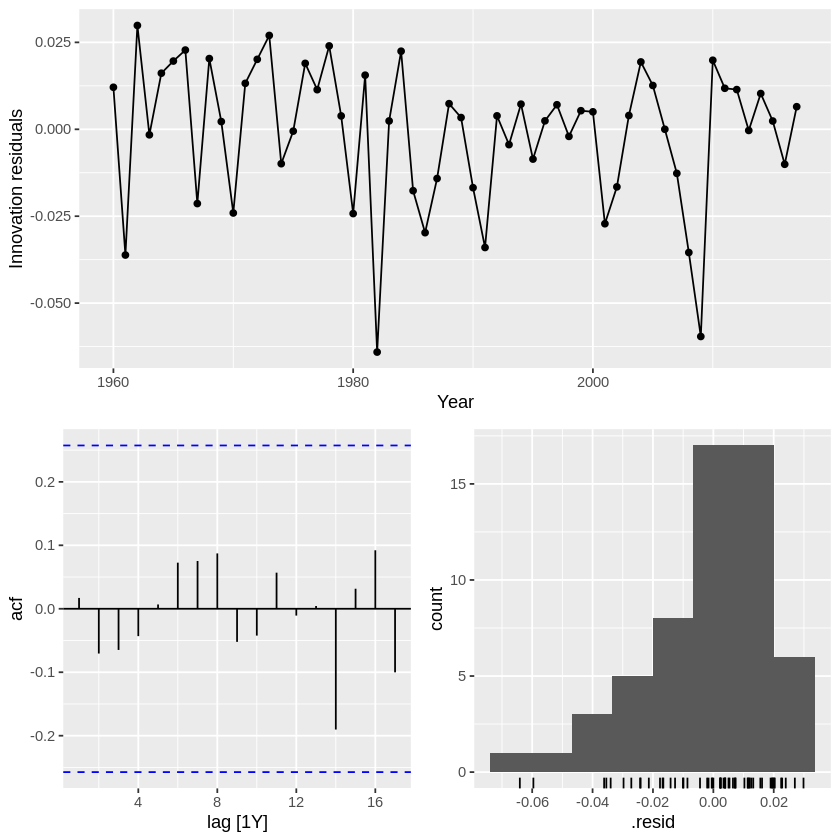

In [22]:
us_econ_fit %>% select(arima021) %>% gg_tsresiduals()

For my example, I wanted to go back to the global economy data, since it was not forecasted well using the Time series regression model. Thus I wanted to use the ARIMA model and the Exponential smoothing models to try to improve the forecast.

For the ARIMA method, I first realized the data had high variance so I logged it. Taking the log, differencing the data twice,  and analyzing the pacf/acf plots I was able to propose a ARIMA(0,2,1) model.
For the exponential smoothing method, looking at the data I saw a clear increasing trend and no seasonality in the data. So I added a additive trend, no seasonality, and additive error.

I also wanted fable to calculate their own models and also included the time series regression model as a reference to improve on (I added a trend predictor).

Next, I fit the model and forecasted. The forecasts for all the model except obviously the TSLM, forecasted a increase in GDP, which made sense. I then wanted to compare the models, and I found out that the arima model that I proposed, the ARIMA(0,2,1), performed arguably the best (this would depend on what accuracy metric you were looking at)

Finally, I looked at the residuals of the ARIMA(0,2,1) model. The residuals exhibited white noise and their was no correlation amongst the residuals. This was good since that meant the model didnt leave any important information in the residuals.

# Conclusion



To warp things up I want to summarize what we learned in this notebook. We first started off introducing some important packages in the tidyverse collection; **tsibble, tsibbleData, fable, and feasts**. The tsibble package provides us the data structure that is used throughout the collection, as we saw! It has three main components; key, index, and measured variable. The tsibbleData package provides users, clean and easy-to-use datasets for practicing time series analysis. Most of the data we used was from this package! Furthur practice would be now looking at external datasets and doing the data preperation yourself; whether it be converting to a tsibble or identifying the corresponding levels. The fable package is one of the most important packages in this collection as it allows us to forecast data. You define a model or multiple models through the model() function. We discussed three models; Exponential Smoothing, ARIMA, and the Time Series Regression Model. But there are more complex models that you can use. You can then forecast data using these models using forecast() function and compare mutliple models using the accuracy() function.

Some next steps for this exploration is looking at more complex models. In my exploration I did briefly read about Dynamic Regression models, which as mentioned combines relevant outside predictors with past time series data. Also looking more into the feasts package as it has a lot of usefull tools when analyzing time series data.

# References

“Forecasting: Principles&nbsp;and&nbsp;Practice (3rd&nbsp;Ed).” OTexts, otexts.com/fpp3/. Accessed 6 Dec. 2023.

GitHub, github.com/eds-uga/csci-x360-fa23/blob/main/lectures/PythonCrashCourse.ipynb. Accessed 6 Dec. 2023.

“Tidyverts.” Tidyverts, tidyverts.org/. Accessed 6 Dec. 2023.

YouTube, YouTube, 19 Nov. 2018, https://www.youtube.com/watch?v=6v3_AsbhqrE&amp;t=932s. Accessed 6 Dec. 2023.

O’Hara-Wild, Mitchell. Introducing Fable, 30 Sept. 2019, www.mitchelloharawild.com/blog/fable/.

